In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import soundscapy as sspy
from soundscapy.databases import isd

# Advanced Visualization Techniques in Soundscapy

## Introduction

This tutorial explores the advanced visualization capabilities of the `Soundscapy` package for soundscape analysis. Effective visualization is crucial for understanding and communicating soundscape data, and Soundscapy provides a range of powerful tools to create informative and visually appealing plots.

### Learning Objectives

By the end of this tutorial, you will be able to:
- Create and customize basic scatter and density plots for soundscape data
- Generate multi-panel visualizations with subplots
- Compare multiple locations or conditions using different visualization techniques
- Create joint plots with marginal distributions
- Apply best practices for effective soundscape visualization

Let's begin by loading some sample data from the International Soundscape Database (ISD):

In [2]:
# Load the ISD dataset
data = isd.load()

# Validate the dataset
valid_data, _ = isd.validate(data)

# Calculate ISO coordinates if not already present
if "ISOPleasant" not in valid_data.columns or "ISOEventful" not in valid_data.columns:
    valid_data = sspy.surveys.add_iso_coords(valid_data)

# Display basic information about the dataset
print(f"Dataset shape: {valid_data.shape}")
print(f"Number of locations: {valid_data['LocationID'].nunique()}")
print(f"Number of records: {valid_data['RecordID'].nunique()}")

Dataset shape: (3533, 144)
Number of locations: 26
Number of records: 2622


## 1. Basic Visualization Techniques

Soundscapy provides several core visualization functions that form the foundation of soundscape data visualization. The most commonly used are:

- `scatter`: Creates a scatter plot of ISO coordinates
- `density`: Creates a density plot showing the distribution of ISO coordinates
- `iso_plot`: A versatile function that can create scatter plots, density plots, or combinations of both

Let's explore these basic visualization techniques:

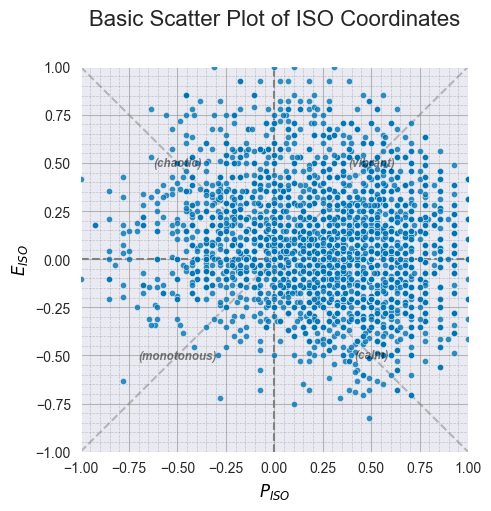

In [3]:
# 1.1 Basic scatter plot
ax = sspy.scatter(
    valid_data,
    title="Basic Scatter Plot of ISO Coordinates",
    diagonal_lines=True,
)
plt.show()

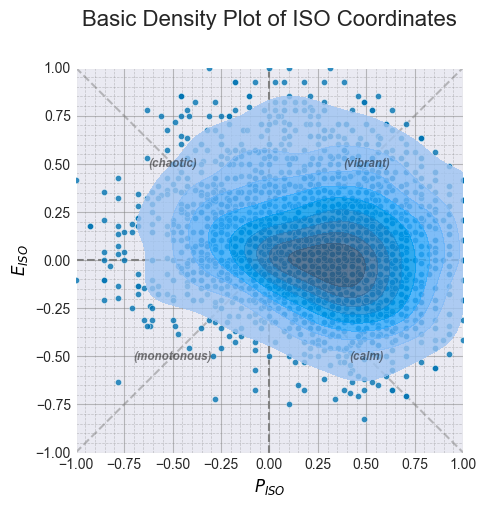

In [4]:
# 1.2 Basic density plot
ax = sspy.density(
    valid_data,
    title="Basic Density Plot of ISO Coordinates",
    diagonal_lines=True,
)
plt.show()

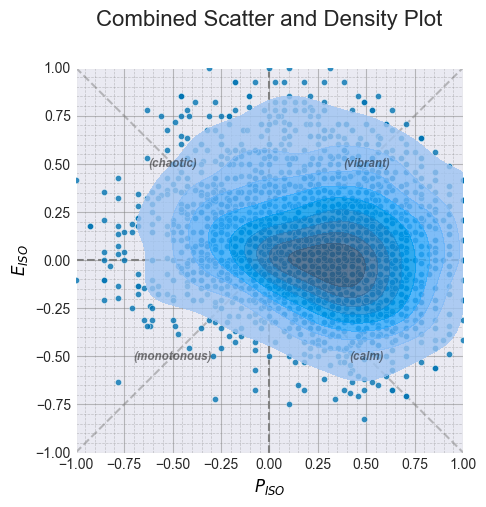

In [5]:
# 1.3 Using iso_plot for combined visualization
ax = sspy.iso_plot(
    valid_data,
    title="Combined Scatter and Density Plot",
    plot_layers=["scatter", "density"],
    diagonal_lines=True,
)
plt.show()

### Customizing Plot Appearance

Soundscapy provides many options for customizing the appearance of your plots. Let's explore some of these options:

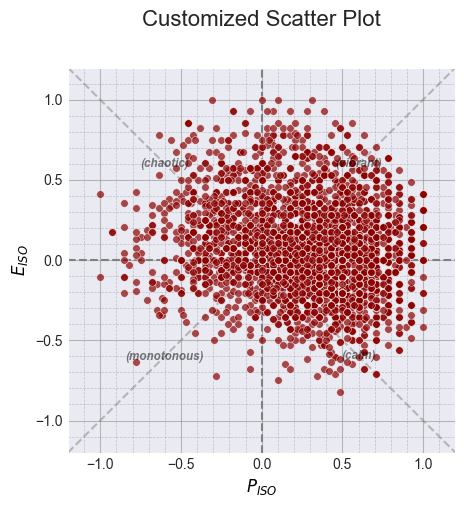

In [6]:
# 1.4 Customizing scatter plots
ax = sspy.scatter(
    valid_data,
    title="Customized Scatter Plot",
    diagonal_lines=True,
    color="darkred",  # Change point color
    s=30,  # Increase point size
    alpha=0.7,  # Add transparency
    xlim=(-1.2, 1.2),  # Customize axis limits
    ylim=(-1.2, 1.2),
)
plt.show()

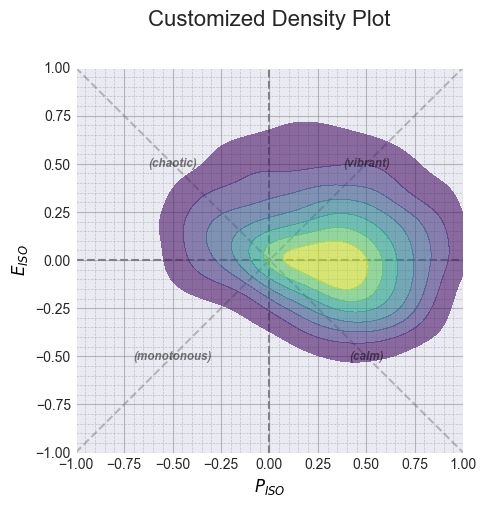

In [7]:
# 1.5 Customizing density plots
ax = sspy.density(
    valid_data,
    title="Customized Density Plot",
    diagonal_lines=True,
    fill=True,  # Fill the contours
    alpha=0.6,  # Adjust transparency
    levels=8,  # Set number of contour levels
    thresh=0.1,  # Set threshold for contours
    cmap="viridis",  # Change colormap
    incl_scatter=False,  # Don't include scatter points
)
plt.show()

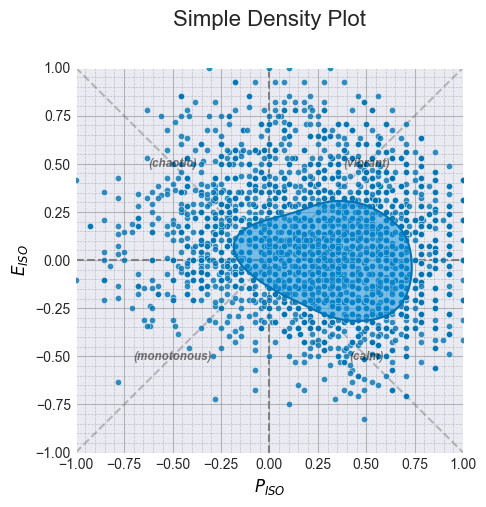

In [8]:
# 1.6 Simple density plot (fewer contours for cleaner visualization)
ax = sspy.density(
    valid_data,
    title="Simple Density Plot",
    density_type="simple",  # Use simple density type
    diagonal_lines=True,
    incl_scatter=True,  # Include scatter points
)
plt.show()

## 2. Grouping and Comparing Data

One of the most powerful features of Soundscapy's visualization tools is the ability to group and compare data based on different variables. This is particularly useful for comparing soundscapes across different locations, times, or conditions.

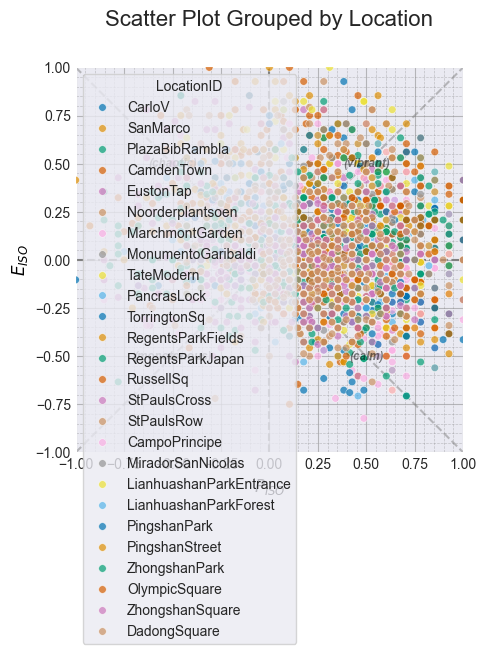

In [9]:
# 2.1 Grouping by location
ax = sspy.scatter(
    valid_data,
    title="Scatter Plot Grouped by Location",
    hue="LocationID",  # Color points by location
    diagonal_lines=True,
    alpha=0.7,
    s=30,
)
plt.show()

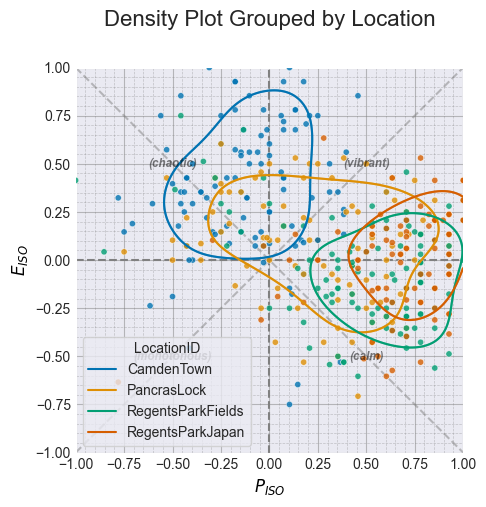

In [10]:
# 2.2 Density plot with grouping
# Select a subset of locations for clearer visualization
selected_locations = [
    "CamdenTown",
    "PancrasLock",
    "RegentsParkJapan",
    "RegentsParkFields",
]
subset_data = isd.select_location_ids(valid_data, selected_locations)

ax = sspy.density(
    subset_data,
    title="Density Plot Grouped by Location",
    hue="LocationID",  # Color contours by location
    density_type="simple",
    incl_scatter=True,
    diagonal_lines=True,
    fill=False,  # Don't fill contours for clearer comparison
)
plt.show()

/var/folders/6t/7h8wn9n92w5f24ml_bkwck9m0000gn/T/ipykernel_8781/1080484220.py:3: ExperimentalWarning: `ISOPlot` is currently under development and should be considered experimental. `ISOPlot` implements an experimental API for creating layered soundscape circumplex plots. Use with caution.
  sspy.ISOPlot(


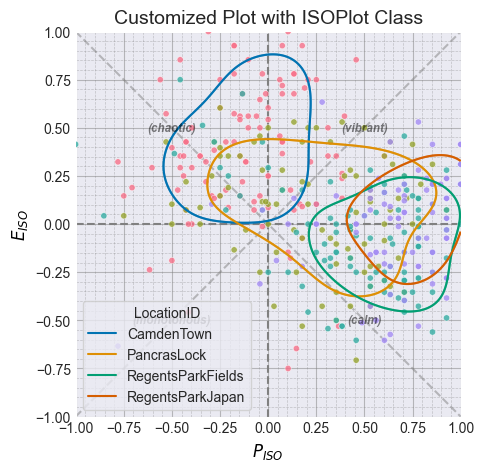

In [11]:
# 2.3 Using the ISOPlot class for more control
p = (
    sspy.ISOPlot(
        data=subset_data,
        title="Customized Plot with ISOPlot Class",
        hue="LocationID",
        palette="husl",  # Use a different color palette
    )
    .create_subplots()  # Create the subplot
    .add_scatter()  # Add scatter layer
    .add_simple_density(fill=False)  # Add simple density layer without fill
    .style(diagonal_lines=True, legend_loc="lower left")  # Apply styling
)
p.show()

## 3. Multi-panel Visualizations

For comparing multiple soundscapes or conditions, multi-panel visualizations are extremely useful. Soundscapy provides several ways to create these:

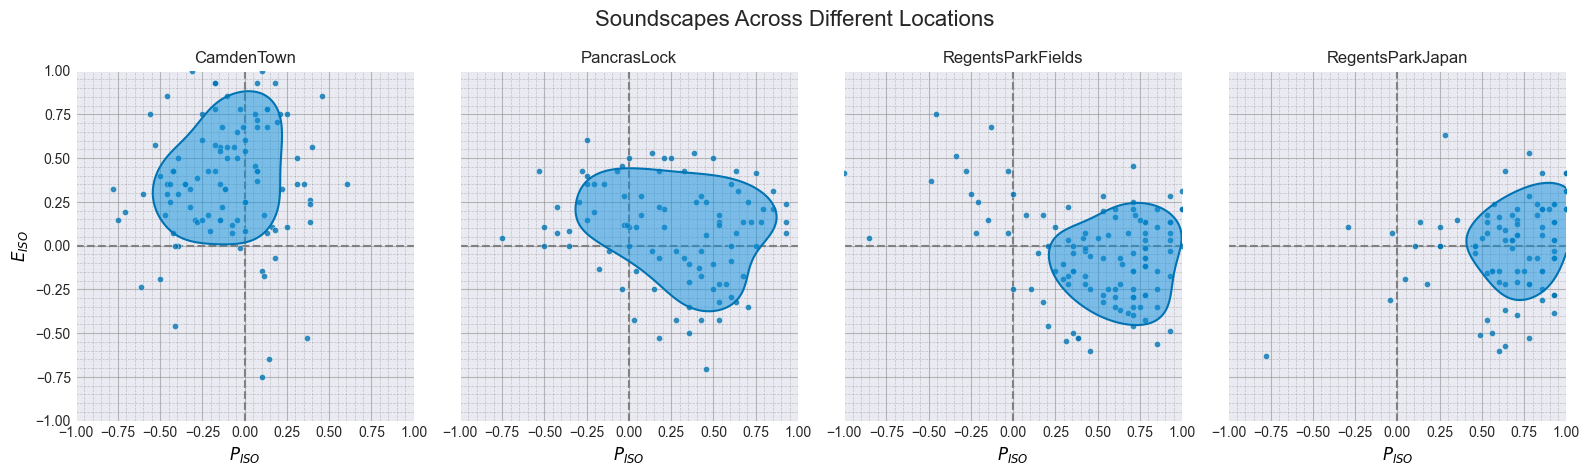

In [23]:
# 3.1 Creating subplots by location - alternative approach
# Get unique locations
locations = subset_data["LocationID"].unique()
n_locations = len(locations)

sspy.create_iso_subplots(
    subset_data,
    title="Soundscapes Across Different Locations",
    subplot_by="LocationID",
    nrows=1,
    ncols=4,
    plot_layers=["scatter", "simple_density"],
)

plt.tight_layout()
plt.show()

/var/folders/6t/7h8wn9n92w5f24ml_bkwck9m0000gn/T/ipykernel_8781/1214186188.py:3: ExperimentalWarning: `ISOPlot` is currently under development and should be considered experimental. `ISOPlot` implements an experimental API for creating layered soundscape circumplex plots. Use with caution.
  sspy.ISOPlot(
/Users/mitch/Documents/GitHub/Soundscapy/src/soundscapy/plotting/iso_plot.py:503: UserWarning: This is an experimental feature. The number of rows and columns may not be optimal.
  self._allocate_subplot_axes(subplot_titles)


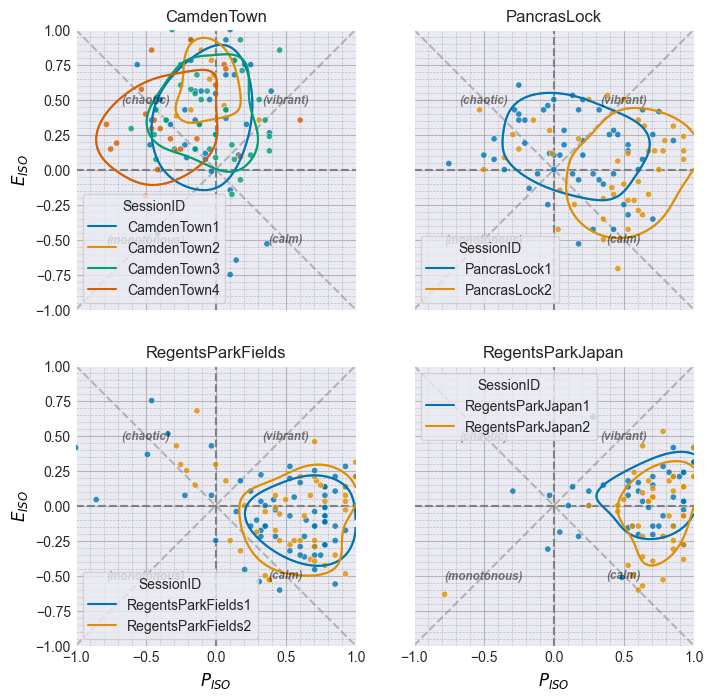

In [24]:
# 3.3 Using the ISOPlot class for more complex multi-panel visualizations
mp = (
    sspy.ISOPlot(
        data=subset_data,
        title=None,
        hue="SessionID",
    )
    .create_subplots(
        subplot_by="LocationID",
        figsize=(4, 4),
        auto_allocate_axes=True,
    )
    .add_scatter()
    .add_simple_density(fill=False)
    .style(title_fontsize=14, diagonal_lines=True)
)
plt.show()

## 4. Joint Plots

Joint plots are a powerful way to visualize the distribution of data along both axes. Soundscapy provides a `jointplot` function that creates a main plot with marginal distributions:

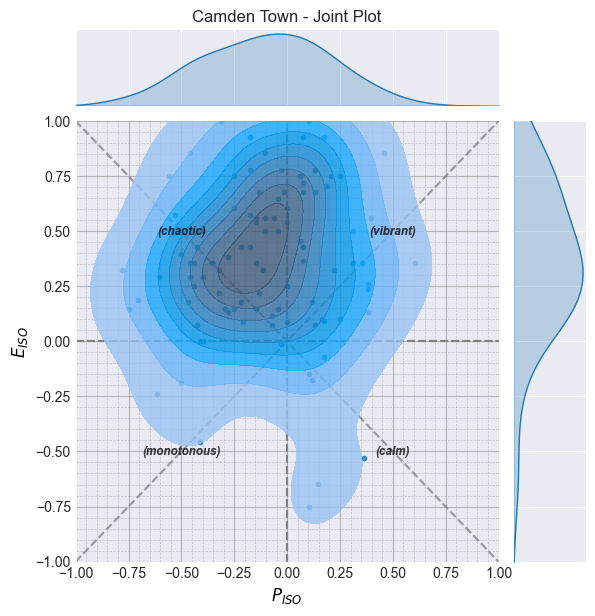

In [26]:
# 4.1 Basic joint plot
g = sspy.jointplot(
    sspy.isd.select_location_ids(valid_data, "CamdenTown"),
    title="Camden Town - Joint Plot",
    diagonal_lines=True,
)
plt.show()

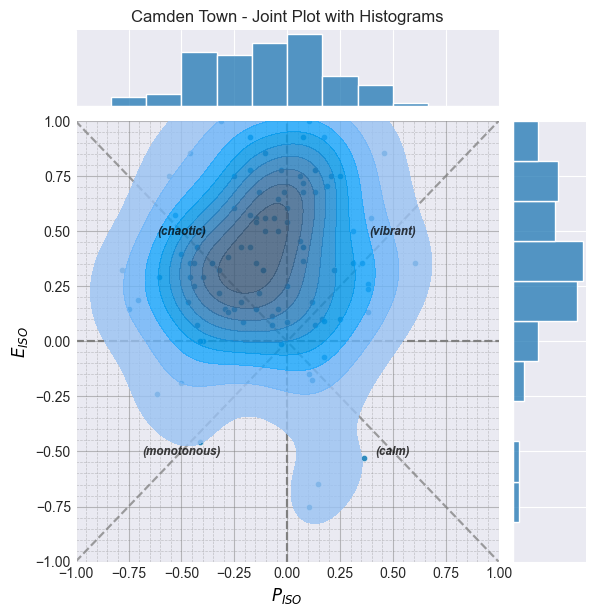

In [27]:
# 4.2 Joint plot with histogram marginals
g = sspy.jointplot(
    sspy.isd.select_location_ids(valid_data, "CamdenTown"),
    title="Camden Town - Joint Plot with Histograms",
    marginal_kind="hist",  # Use histograms for marginals
    diagonal_lines=True,
)
plt.show()

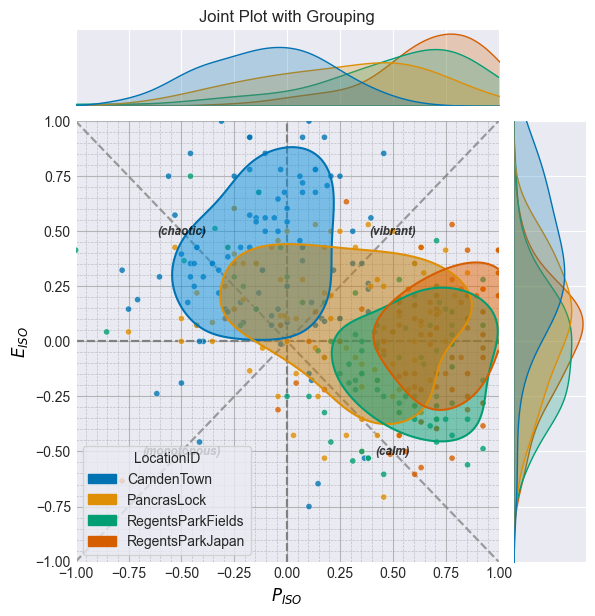

In [28]:
# 4.3 Joint plot with grouping
g = sspy.jointplot(
    subset_data,
    title="Joint Plot with Grouping",
    hue="LocationID",
    density_type="simple",
    diagonal_lines=True,
)
plt.show()

## 5. Advanced Customization Techniques

For more advanced customization, Soundscapy provides several options:

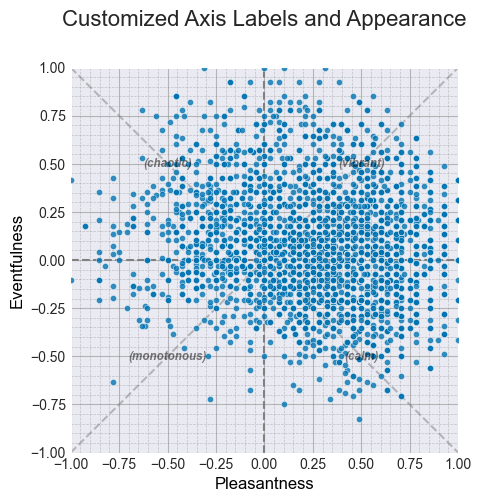

In [29]:
# 5.1 Customizing axis labels and appearance
ax = sspy.scatter(
    valid_data,
    title="Customized Axis Labels and Appearance",
    xlabel="Pleasantness",  # Custom x-axis label
    ylabel="Eventfulness",  # Custom y-axis label
    diagonal_lines=True,
)
plt.show()

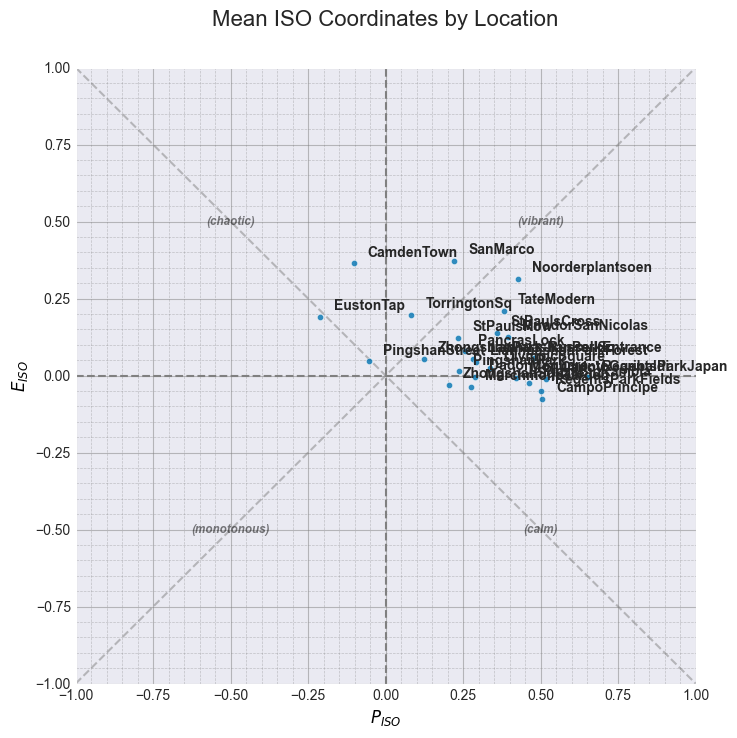

In [30]:
# 5.2 Adding annotations to plots
# Calculate mean ISO coordinates for each location
location_means = valid_data.groupby("LocationID")[["ISOPleasant", "ISOEventful"]].mean()

# Create a scatter plot of the means
fig, ax = plt.subplots(figsize=(8, 8))
ax = sspy.scatter(
    pd.DataFrame(location_means.reset_index()),
    x="ISOPleasant",
    y="ISOEventful",
    title="Mean ISO Coordinates by Location",
    diagonal_lines=True,
    ax=ax,
)

# Add annotations for each location
for idx, row in location_means.iterrows():
    ax.annotate(
        str(idx),  # Location name (converted to string)
        (row["ISOPleasant"], row["ISOEventful"]),  # Position
        xytext=(10, 5),  # Offset
        textcoords="offset points",
        fontsize=10,
        fontweight="bold",
    )

plt.show()

## 6. Best Practices for Effective Visualization

When creating visualizations for soundscape data, consider the following best practices:

1. **Choose the right plot type**:
   - Use scatter plots to show individual data points
   - Use density plots to show the distribution of data
   - Use joint plots to show both the distribution and individual points

2. **Use appropriate grouping**:
   - Group by location, time, or other relevant variables
   - Use color to distinguish between groups
   - Limit the number of groups to avoid visual clutter

3. **Customize for clarity**:
   - Use appropriate axis limits (typically -1 to 1 for ISO coordinates)
   - Add informative titles and labels

4. **Consider your audience**:
   - For academic publications, use simple, clear visualizations
   - For presentations, use more visually appealing plots
   - For reports, use a combination of plot types to tell a complete story

Let's apply these best practices to create an effective visualization for a report:

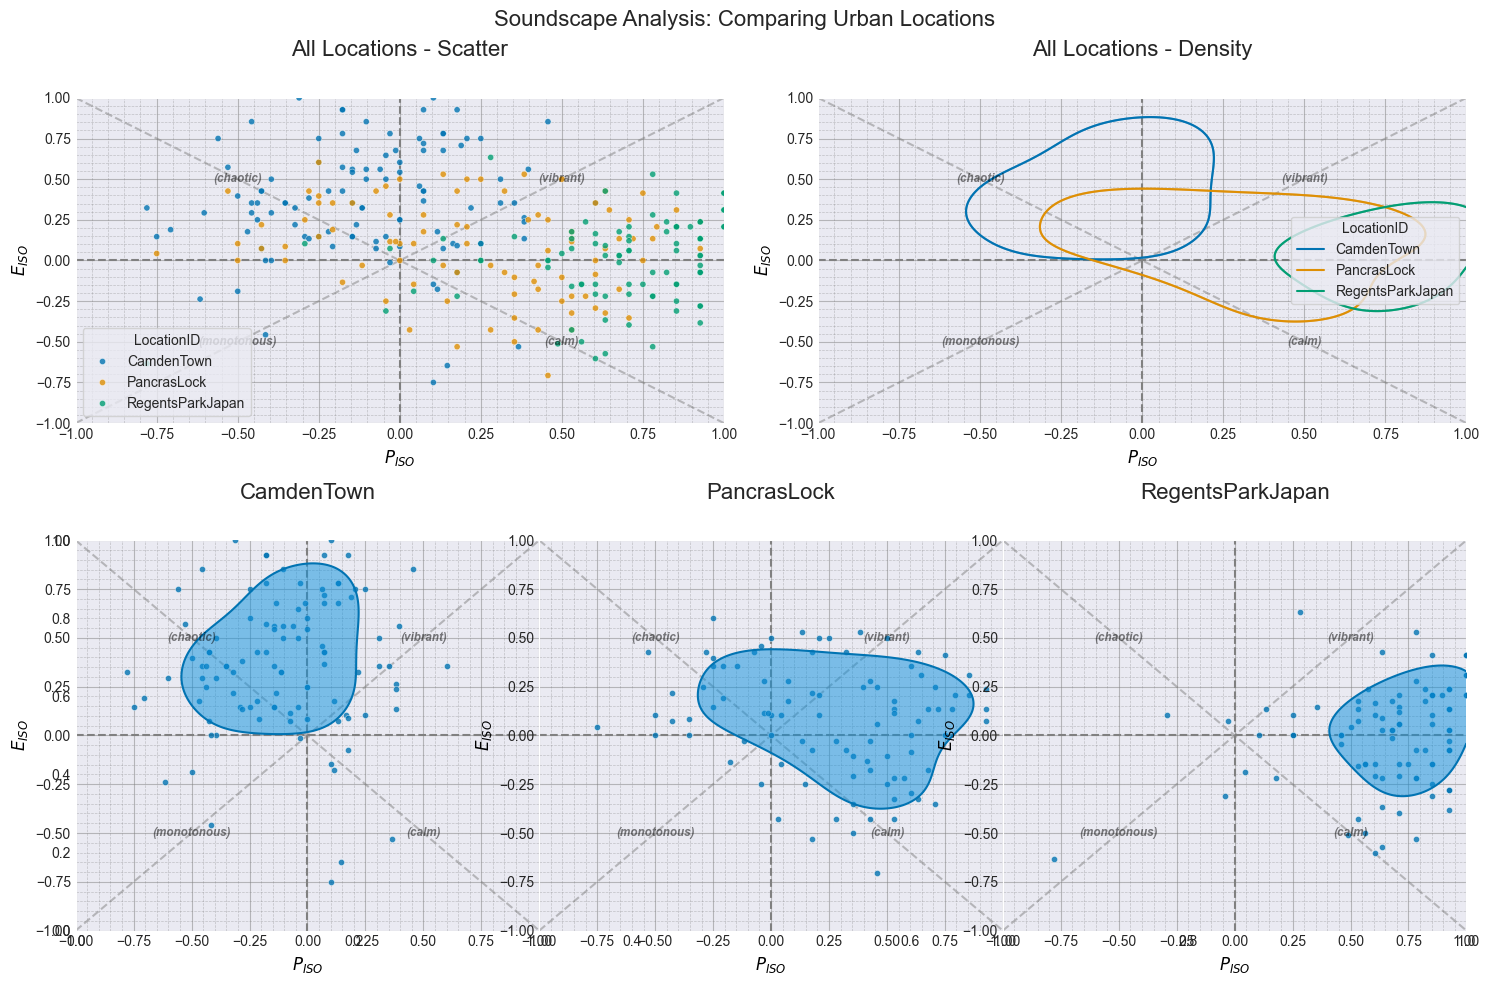

In [21]:
# 6.1 Creating an effective visualization for a report
# Select data for multiple locations
report_locations = ["CamdenTown", "PancrasLock", "RegentsParkJapan"]
report_data = isd.select_location_ids(valid_data, report_locations)

# Create a figure with multiple subplots
fig = plt.figure(figsize=(15, 10))

# Add a title to the figure
fig.suptitle("Soundscape Analysis: Comparing Urban Locations", fontsize=16, y=0.98)

# Create a 2x2 grid of subplots
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1.2])

# Create a scatter plot of all locations in the first subplot
ax1 = fig.add_subplot(gs[0, 0])
sspy.scatter(
    report_data,
    title="All Locations - Scatter",
    hue="LocationID",
    diagonal_lines=True,
    ax=ax1,
)

# Create a density plot of all locations in the second subplot
ax2 = fig.add_subplot(gs[0, 1])
sspy.density(
    report_data,
    title="All Locations - Density",
    hue="LocationID",
    density_type="simple",
    incl_scatter=False,
    fill=False,
    diagonal_lines=True,
    ax=ax2,
)

# Create individual density plots for each location in the bottom row
ax3 = fig.add_subplot(gs[1, :])

# Get unique locations
report_locations = report_data["LocationID"].unique()
n_report_locations = len(report_locations)

# Create a grid of subplots within ax3
for i, location in enumerate(report_locations):
    # Calculate subplot position
    pos = [i / n_report_locations, 0, 1 / n_report_locations, 1]
    subax = ax3.inset_axes(pos)

    # Get data for this location
    loc_data = report_data[report_data["LocationID"] == location]

    # Plot data
    sspy.iso_plot(
        loc_data,
        title=location,
        plot_layers=["scatter", "simple_density"],
        diagonal_lines=True,
        ax=subax,
    )

plt.tight_layout()
plt.show()

## 7. Exporting and Saving Visualizations

Once you've created your visualizations, you'll often want to save them for use in reports, presentations, or publications. Matplotlib provides several ways to save figures:

In [ ]:
# 7.1 Saving a figure to a file
fig, ax = plt.subplots(figsize=(8, 8))
sspy.scatter(
    valid_data,
    title="Soundscape Scatter Plot",
    diagonal_lines=True,
    ax=ax,
)

# Save the figure to a file (commented out to avoid creating files during tutorial)
# fig.savefig("soundscape_scatter.png", dpi=300, bbox_inches="tight")
# fig.savefig("soundscape_scatter.pdf", bbox_inches="tight")  # For publication-quality PDF
# fig.savefig("soundscape_scatter.svg", bbox_inches="tight")  # For vector graphics

plt.close(fig)  # Close the figure to avoid displaying it again

## Summary

In this tutorial, we've explored the advanced visualization capabilities of the Soundscapy package for soundscape analysis. We've covered:

1. **Basic visualization techniques** using scatter, density, and iso_plot functions
2. **Grouping and comparing data** across different locations or conditions
3. **Creating multi-panel visualizations** for comprehensive analysis
4. **Using joint plots** to show distributions along both axes
5. **Advanced customization techniques** for creating tailored visualizations
6. **Best practices for effective visualization** in different contexts
7. **Exporting and saving visualizations** for reports and publications

These visualization techniques provide powerful tools for understanding and communicating soundscape data, allowing researchers and practitioners to gain insights and share findings effectively.

## References

1. Mitchell, A., Aletta, F., & Kang, J. (2022). How to analyse and represent quantitative soundscape data. JASA Express Letters, 2, 37201. https://doi.org/10.1121/10.0009794
2. ISO 12913-3:2019. Acoustics — Soundscape — Part 3: Data analysis.